In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt
from datetime import datetime, timedelta

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)


In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
station = Base.classes.station
measurement = Base.classes.measurement

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
recent_Date = session.query(measurement.date).order_by(measurement.date.desc()).first()
recent_Date[0]

'2017-08-23'

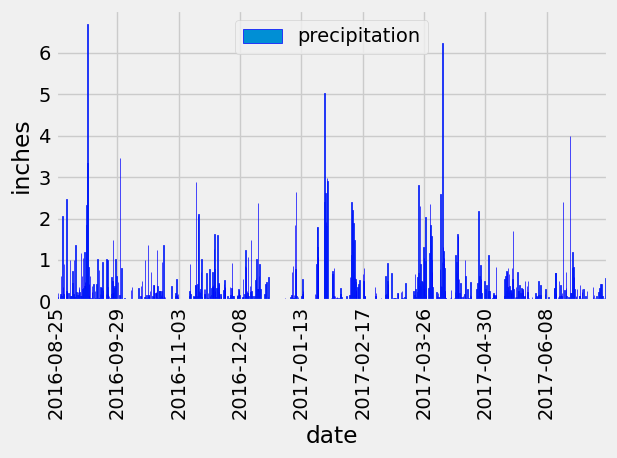

In [10]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 
# Calculate the date one year from the last date in data set.
difference_Date = datetime.strptime(recent_Date[0], "%Y-%m-%d") - timedelta(weeks=52)

# Perform a query to retrieve the data and precipitation scores
scores = session.query(measurement.date, measurement.prcp).filter(measurement.date >= difference_Date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
scores_df = pd.DataFrame(scores, columns=["date", "precipitation"])

# Sort the dataframe by date
scores_df = scores_df.sort_values("date").reset_index(drop=True)

#Clean Set, there are NAN values
scores_df = scores_df.dropna()

# Use Pandas Plotting with Matplotlib to plot the data
# Some values were not showing when using plot bar without EC
scores_df[['precipitation']].plot.bar(ec='blue', xlabel = "date", ylabel = "inches", width=2 )

#Plot ticks
ticks = np.arange(0, len(scores_df['date']), step=len(scores_df['date'])/9)

#Get tick label for corresponding tick/index value for date
date_Labels = [scores_df['date'][round(tick)] for tick in ticks]
date_Labels
plt.xticks(np.arange(0, len(scores_df['date']), step=len(scores_df['date'])/9), date_Labels)
plt.yticks(np.arange(0, 7, step= 1))
plt.tight_layout()
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
scores_df.describe()

,precipitation
count,2009.000000
mean,0.172344
std,0.452818
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset
total_Number_Stations = session.query(func.count(station.station)).all()
total_Number_Stations 

[(9,)]

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
most_Active = session.query(measurement.station, func.count(measurement.station)).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
most_Active

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [132]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_Active_Stats = session.query(func.min(measurement.tobs), func.max(measurement.tobs), func.avg(measurement.tobs)).filter(measurement.station == most_Active[0][0]).all()
most_Active_Stats

[(54.0, 85.0, 71.66378066378067)]

In [14]:
#Get recent result for active station
active_Station_Temps = session.query(measurement.date, measurement.tobs).filter(measurement.station == 'USC00519281').order_by(measurement.date.desc()).first()
active_Station_Temps

('2017-08-18', 79.0)

In [15]:
# Calculate time difference
active_Difference = datetime.strptime(activeStationTemps[0], "%Y-%m-%d") - timedelta(weeks=52)
active_Difference

datetime.datetime(2016, 8, 19, 0, 0)

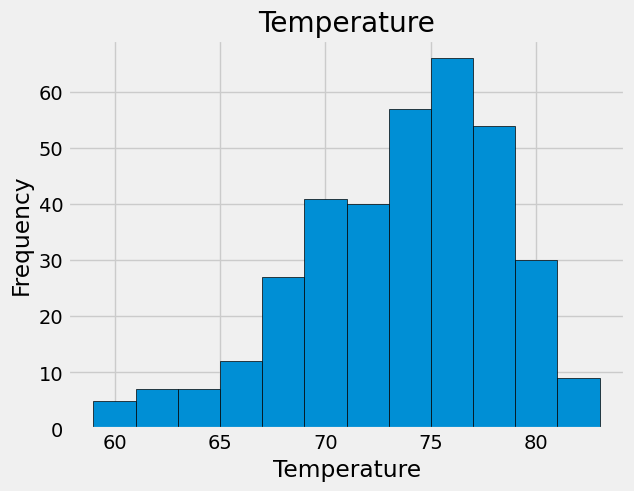

In [167]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
active_Temps = session.query(measurement.tobs).filter(measurement.station == 'USC00519281').filter(measurement.date >= active_Difference).all()
activeTemps_df = pd.DataFrame(active_Temps, columns=["Temperature"])
activeTemps_df.hist(column='Temperature', bins=12, ec="k")
plt.ylabel("Frequency")
plt.xlabel("Temperature")
plt.show()

# Close Session

In [16]:
# Close Session
session.close()